In [1]:
import tensorflow
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import TimeDistributed
from keras.layers import SimpleRNN

Using TensorFlow backend.


In [2]:
PNG_PATH = "/home/ryo/Área de Trabalho/PIBIC/Database/img/"
NPZ_PATH = "/home/ryo/Área de Trabalho/PIBIC/Database/npz/"

In [3]:
circle = np.load(NPZ_PATH + 'bubbles.npz')
square = np.load(NPZ_PATH + 'square.npz')

In [4]:
circle_images = circle.f.arr_0
square_images = square.f.arr_0

In [45]:
circle_images[:2]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [6]:
square_images[:2]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]], dtype=float32)

In [5]:
train_cir_img = circle_images[:80]
train_sqr_img = square_images[:80]
test_cir_img = circle_images[80:100]
test_sqr_img = square_images[80:100]

In [7]:
train_cir_sqr_img = np.concatenate((train_cir_img, train_sqr_img))
test_cir_sqr_img = np.concatenate((test_cir_img, test_sqr_img))

In [8]:
# o array tem 100 imagens de circulo e 100 de quadrados com formato 50x50
print(len(train_cir_sqr_img))
print(len(test_cir_sqr_img))

160
40


In [9]:
train_images_target = []
test_images_target = []
for i in range(80):
    zero_um = (0,1)
    train_images_target.append(zero_um)
    
for i in range(80):
    um_zero = (1,0)
    train_images_target.append(um_zero)
    
for i in range(20):
    zero_um = (0,1)
    test_images_target.append(zero_um)
    
for i in range(20):
    um_zero = (1,0)
    test_images_target.append(um_zero)

In [10]:
X = np.reshape(train_cir_sqr_img, (160, 50, 50))
y = np.array(train_images_target)

In [11]:
import math
n_input_layer = 2500
n_output_layer = 1
n_hidden_layer = round(math.sqrt((n_input_layer*n_output_layer)))
print("nro de neurônios na hidden layer:", n_hidden_layer)

nro de neurônios na hidden layer: 50


In [12]:
from keras.callbacks import EarlyStopping
from matplotlib import pyplot

In [13]:
model=Sequential()
model.add(SimpleRNN(n_hidden_layer, 
                    input_shape=(50,50), 
                    kernel_initializer='random_normal'))
model.add(Dense(2, activation='sigmoid'))
# model.compile(loss = 'mse', optimizer = 'rmsprop')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 50)                5050      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 102       
Total params: 5,152
Trainable params: 5,152
Non-trainable params: 0
_________________________________________________________________


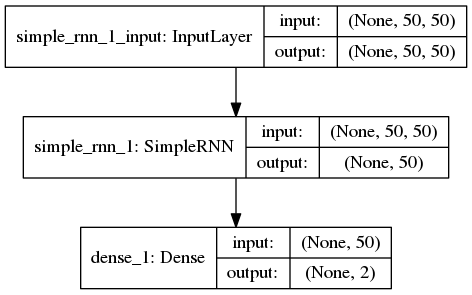

In [14]:
from keras.utils.vis_utils import plot_model
import graphviz
from interface import implements, Interface
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [15]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [30]:
history = model.fit(X, y, epochs = 100, batch_size = 32, callbacks=[es])

Epoch 1/100
160/160 [==============================] - 0s 412us/step - loss: 1.0038 - accuracy: 0.6812
Epoch 2/100
160/160 [==============================] - 0s 410us/step - loss: 0.5716 - accuracy: 0.7531
Epoch 3/100
160/160 [==============================] - 0s 361us/step - loss: 0.6763 - accuracy: 0.6000
Epoch 4/100
160/160 [==============================] - 0s 321us/step - loss: 0.8260 - accuracy: 0.5437
Epoch 5/100
 32/160 [=====>........................] - ETA: 0s - loss: 0.8056 - accuracy: 0.5781

/home/ryo/miniconda/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


160/160 [==============================] - 0s 373us/step - loss: 0.7308 - accuracy: 0.6031
Epoch 6/100
160/160 [==============================] - 0s 342us/step - loss: 0.6696 - accuracy: 0.6406
Epoch 7/100
160/160 [==============================] - 0s 354us/step - loss: 0.5370 - accuracy: 0.7375
Epoch 8/100
160/160 [==============================] - 0s 358us/step - loss: 0.4936 - accuracy: 0.8188
Epoch 9/100
160/160 [==============================] - 0s 360us/step - loss: 0.4391 - accuracy: 0.8625
Epoch 10/100
160/160 [==============================] - 0s 357us/step - loss: 0.4006 - accuracy: 0.8562
Epoch 11/100
160/160 [==============================] - 0s 344us/step - loss: 0.3871 - accuracy: 0.8313
Epoch 12/100
160/160 [==============================] - 0s 347us/step - loss: 0.3683 - accuracy: 0.8781
Epoch 13/100
160/160 [==============================] - 0s 329us/step - loss: 0.3688 - accuracy: 0.8562
Epoch 14/100
160/160 [==============================] - 0s 396us/step - loss: 0.3

Epoch 84/100
160/160 [==============================] - 0s 451us/step - loss: 0.0059 - accuracy: 1.0000
Epoch 85/100
160/160 [==============================] - 0s 406us/step - loss: 0.0058 - accuracy: 1.0000
Epoch 86/100
160/160 [==============================] - 0s 326us/step - loss: 0.0057 - accuracy: 1.0000
Epoch 87/100
160/160 [==============================] - 0s 325us/step - loss: 0.0056 - accuracy: 1.0000
Epoch 88/100
160/160 [==============================] - 0s 325us/step - loss: 0.0055 - accuracy: 1.0000
Epoch 89/100
160/160 [==============================] - 0s 325us/step - loss: 0.0054 - accuracy: 1.0000
Epoch 90/100
160/160 [==============================] - 0s 290us/step - loss: 0.0053 - accuracy: 1.0000
Epoch 91/100
160/160 [==============================] - 0s 360us/step - loss: 0.0052 - accuracy: 1.0000
Epoch 92/100
160/160 [==============================] - 0s 349us/step - loss: 0.0051 - accuracy: 1.0000
Epoch 93/100
160/160 [==============================] - 0s 290us

In [31]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


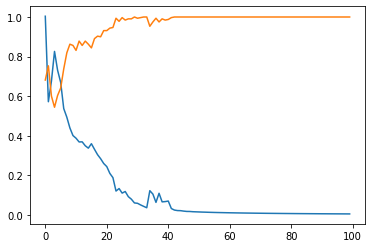

In [48]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')

In [33]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [36]:
test = np.reshape(test, (40, 1000, 1))

In [37]:
predictions = model.predict(test_cir_sqr_img)
for i in range(len(test)):
    print(predictions[i], 'expected', test_target[i])

[0.00196873 0.99789524] expected (0, 1)
[0.00222432 0.9973966 ] expected (0, 1)
[0.00681893 0.992297  ] expected (0, 1)
[0.00195031 0.9981287 ] expected (0, 1)
[0.01414254 0.99104214] expected (0, 1)
[0.00429251 0.99463296] expected (0, 1)
[0.0041846  0.99469876] expected (0, 1)
[0.00900411 0.9926041 ] expected (0, 1)
[0.00262401 0.99725205] expected (0, 1)
[0.01526741 0.9905434 ] expected (0, 1)
[0.01581786 0.98873246] expected (0, 1)
[0.00323499 0.9960741 ] expected (0, 1)
[0.01050632 0.989316  ] expected (0, 1)
[0.00398723 0.99473286] expected (0, 1)
[0.00376221 0.99494743] expected (0, 1)
[0.00931295 0.98888063] expected (0, 1)
[0.00322465 0.99542314] expected (0, 1)
[0.00230203 0.9981458 ] expected (0, 1)
[0.01692317 0.9901507 ] expected (0, 1)
[0.00454706 0.99459296] expected (0, 1)
[0.997358   0.00241079] expected (1, 0)
[0.99745184 0.00258326] expected (1, 0)
[0.9920294  0.00621794] expected (1, 0)
[0.99739206 0.00242755] expected (1, 0)
[0.9965373  0.00270983] expected (1, 0)


In [38]:
test_target_arr = np.array(test_target)

In [39]:
predictions_rounded = np.matrix.round(predictions)

In [40]:
y_test_classes = test_target_arr.argmax(1)
y_pred_classes = predictions_rounded.argmax(1)

In [41]:
y_pred_classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
y_test_classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_pred_classes, y_test_classes)

In [44]:
print(matrix)

[[20  0]
 [ 0 20]]
